In [43]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [18]:
import pandas as pd
from datetime import datetime
import numpy as np

In [13]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [14]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [15]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [16]:
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934

dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


# **Inicio da Classificação**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [17]:
# Define X e Y
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [21]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Em nosso projeto de venda de carros, executamos o LinearSVC para sabermos qual seria a porcentagem de acurácia, e tivemos um resultado de 57.88%.

Para definirmos se esse resultado é bom ou ruim, ainda precisamos de uma base comparativa, estipulando qual seria o mínimo de acerto aceitável - por exemplo, se todos os palpites fossem 0 ou 1.

Já fizemos esse procedimento anteriormente por meio de np.ones(), criando um array de 1 com o número de elementos que queríamos utilizar. Como esse é um processo bastante recorrente, as bibliotecas possuem ferramentas que facilitam nosso trabalho.

Como podemos verificar na documentação da biblioteca SKLearn, ele possui um estimador conhecido como DummyClassifier, que é basicamente o que o nome diz: um classificador "bobo".

Isso porque ele possui várias estratégias bem simples de classificação, e que podem ser passadas como parâmetro:

In [23]:
# class sklearn.dummy.DummyClassifier(strategy=’stratified’, random_state=None, constant=None)[source]


Para nossos testes, primeiramente importaremos esse classificador e criaremos a variável dummy como padrão. Em seguida, trabalharemos com os métodos tradicionais fit() e predict(), exatamente como no LinearSVC.

Depois do treino, o DummyClassifier() irá prever os resultados e imprimiremos sua acurácia na tela:

In [27]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 51.08%


Tivemos um resultado de 52.44%. Nosso algoritmo LinearSVC fez 10% a mais (57.88%) - 5% em números absolutos, mas 10% em termos relativos.

Portanto, existe uma melhora do LinearSVC em relação do DummyClassifier. Contudo, a estratégia utilizada pelo DummyClassifier é estratificada ou (stratified), ou seja, proporcional; se temos 30% de itens da classe 0 e 70% da classe 1, o estimador manterá esse padrão em sua classificação.

Deixaremos explícito em nosso código que é essa a estratégia utilizada modificando dummy para dummy_stratified e executaremos novamente o código.

In [28]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 50.64%


Teremos um resultado inferior: 50.58%. Isso se deve pelo uso de valores aleatórios (random_state). Como esse estimador também usa o Numpy como base do valor de SEED, se executarmos o código desde o começo, a acurácia voltará a ser 52.44%.

Por esse motivo é importante, em determinados pontos do projeto, reiniciar o runtime e rodar todo o código novamente. Dessa forma, teremos certeza de que o SEED original foi utilizado e que a ordem de execução foi mantida desde o início.

Testaremos uma outra estratégia do DummyClassifier, o argumento most_frequent, ou "mais frequente".

In [29]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


Como obtemos uma acurácia menor, a estratégia dummy_stratified nos parece mais razoável como baseline, e é ela que queremos superar.

Nosso código está repetitivo em relação ao cálculo da taxa de acurácia, e há formas melhores de gerar esse número. Como este é um procedimento muito comum em classificadores, uma das funções disponíveis nessas bibliotecas é o score, que retorna a acurácia do modelo que estamos testando.

Portanto, ao invés de chamarmos o predict, usaremos o score, que precisará receber teste_x e teste_y como parâmetro para realizar as comparações. Além disso, multiplicaremos o resultado por 100 para obtermos o valor em porcentagem e imprimiremos a acurácia na tela:

In [30]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


Com isso, não precisamos importar o accuracy_score(), reduzindo uma linha do nosso código.

Agora tentaremos detectar padrões não necessariamente lineares para nossos dados. Poderíamos cogitar a ideia de utilizar o SVC, mas é importante lembrar que ele (além de outros estimadores) não pode ser usado diretamente com dados em várias escalas diferentes.

Aprendemos no projeto anterior que precisamos reescalar nossos dados utilizando o StandardScaler() do pré-processamento.

Reaproveitaremos o código do projeto anterior e o revisaremos em busca de adaptações necessárias. Nele, temos o SEED fixo, a quebra dos dados de treino e teste e a separação do treino raw (os dados antes de serem reescalados).

Em seguida, o StandardScaler(), a partir da média, desloca esses dados e divide pelo desvio padrão, criando um intervalo. Com esse treino, os dados crus são transformados em treino_x e teste_x, que então são utilizados no treino e no teste do nosso modelo. Por fim, imprimimos a acurácia:

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


Com esse resultado, tivemos em ganho muito grande de acurácia em relação à baseline - aproximadamente 25% de ganho absoluto e 48% de ganho relativo.

No entanto, ainda não estamos compreendendo quais critérios o algoritmo usa para definir qual carro será vendido e qual não.

Não é trivial estudarmos a estrutura interna desses algoritmos para entendermos por que estão sendo tomadas determinadas decisões. Algoritmos de classificação como o Support Vector Machine são difíceis de estudar e interpretar, e, por esse motivo, são apelidados de "caixa preta" (ou black box, em inglês).

Mas será que existem classificadores que conseguem exibir com clareza quais são as regras de decisão que são tomadas para chegar na classificação? Na verdade sim, e aprenderemos quais são eles nas próximas aulas.

# **Arvore de Decisão**

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.32%


Porém, nosso foco agora é compreender como as decisões estão sendo tomadas. Para tanto, usaremos outra funcionalidade do módulo sklearn.tree para exportar a visualização gráfica da árvore de decisões. O nome dessa função é export_graphviz.

Chamaremos a visualização gráfica do nosso modelo. Porém, como estamos no cloud do Google, pode ser necessário instalar algumas bibliotecas.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(modelo)

Rodando o código, seremos avisados de que out_file precisa ser passado como parâmetro se quisermos salvar a visualização em um arquivo. Como não queremos isso, escreveremos out_file=None.

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(modelo, out_file=None)

In [44]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


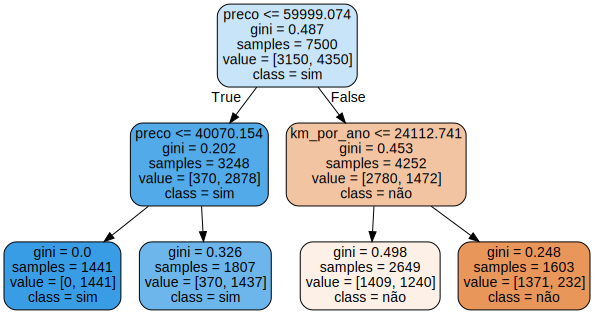

In [47]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

Agora temos uma visualização mais clara, com as cores azul e laranja indicando tipos diferentes de classificação: se um preço for menor que um valor específico, o item será direcionado para a classe "sim", por exemplo, simbolizada pela cor azul. No caso de classificação negativa, teremos a cor laranja. O branco representa uma espécie de incerteza quanto à classificação.

Ainda há um ponto a ser analisado: no primeiro quadro perceberemos que o preço utilizado para definir a classificação é -0.196, um valor negativo. O que isso significa? Que as pessoas estão pagando para vender seus carros?!



Na verdade, as features foram normalizadas, isto é, fizemos a escala retirando a média e dividindo pelo desvio padrão. Dessa forma, esses não são os valores originais das features, e não estamos lidando com o preço real de um carro.

As árvores de decisão não exigem que realizemos reescalas para que tenhamos um funcionamento adequado, portanto podemos retirar o trecho de código relacionado ao StandardScaler():

In [48]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

Podemos trabalhar diretamente com os dados crus, já que a árvore funciona mesmo com escalas diferentes. Ao executarmos o código, teremos a mesma taxa de acurácia anterior 76.84%.

In [51]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


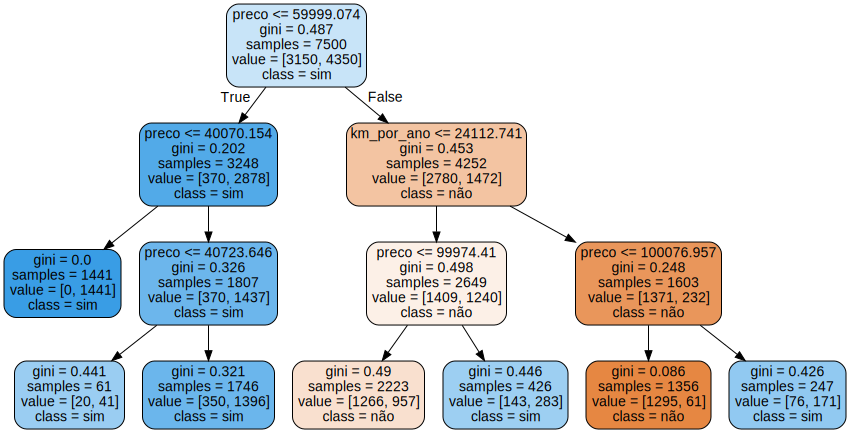

In [52]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico